Columnas VM: Index(['timestamp', 'cpu_percent', 'memory_percent'], dtype='object')
Columnas Docker: Index(['timestamp', 'cpu_percent', 'memory_percent'], dtype='object')


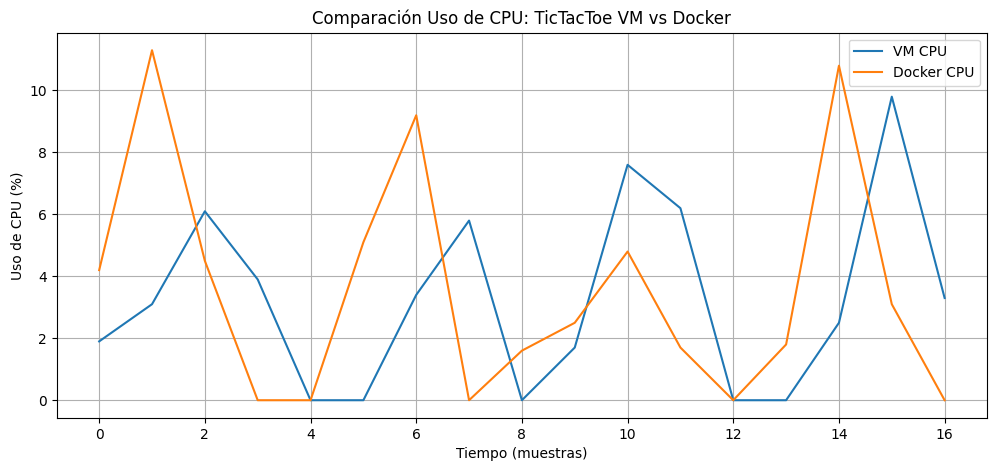

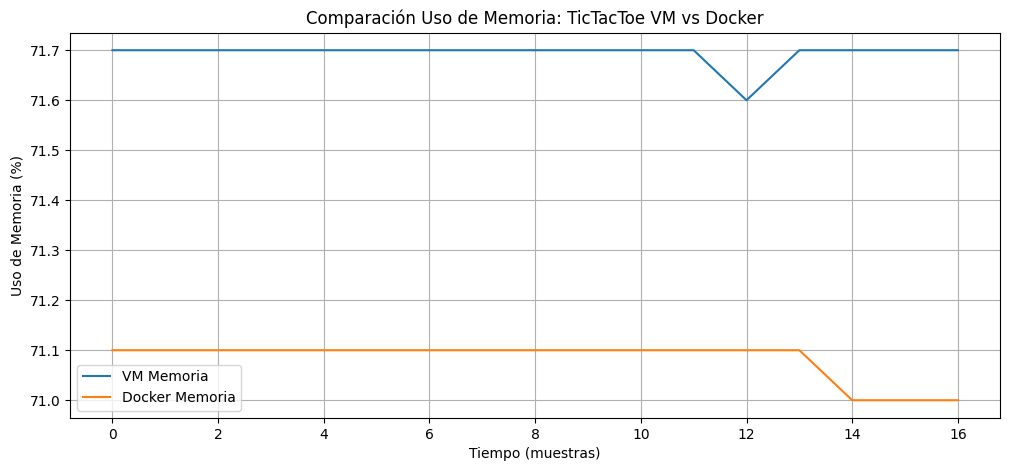

Estadísticas VM CPU (%)
count    17.000000
mean      3.252941
std       2.991889
min       0.000000
25%       0.000000
50%       3.100000
75%       5.800000
max       9.800000
Name: cpu_percent, dtype: float64

Estadísticas Docker CPU (%)
count    17.000000
mean      3.564706
std       3.745321
min       0.000000
25%       0.000000
50%       2.500000
75%       4.800000
max      11.300000
Name: cpu_percent, dtype: float64

Estadísticas VM Memoria (%)
count    17.000000
mean     71.694118
std       0.024254
min      71.600000
25%      71.700000
50%      71.700000
75%      71.700000
max      71.700000
Name: memory_percent, dtype: float64

Estadísticas Docker Memoria (%)
count    17.000000
mean     71.082353
std       0.039295
min      71.000000
25%      71.100000
50%      71.100000
75%      71.100000
max      71.100000
Name: memory_percent, dtype: float64


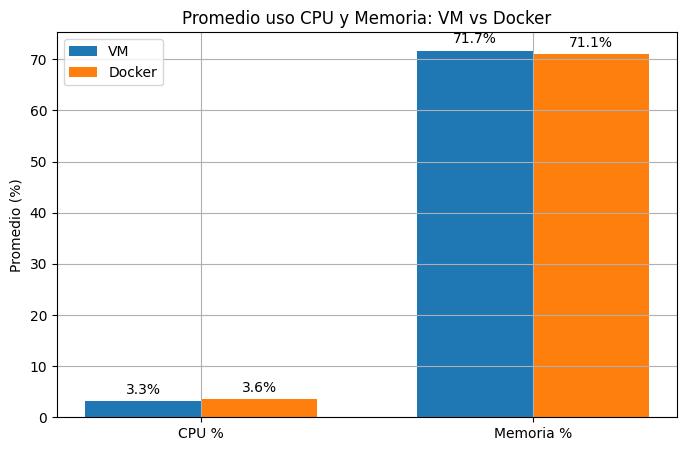

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Ruta a carpeta results
results_path = os.path.join("..", "results")

# Cargar datos de benchmark TicTacToe VM y Docker
vm = pd.read_csv(os.path.join(results_path, "benchmark_tictactoe_vm.csv"))
docker = pd.read_csv(os.path.join(results_path, "benchmark_tictactoe_docker.csv"))

# Mostrar columnas para verificar (opcional)
print("Columnas VM:", vm.columns)
print("Columnas Docker:", docker.columns)

# Gráfica uso CPU
plt.figure(figsize=(12, 5))
plt.plot(vm["cpu_percent"], label="VM CPU")
plt.plot(docker["cpu_percent"], label="Docker CPU")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Uso de CPU (%)")
plt.title("Comparación Uso de CPU: TicTacToe VM vs Docker")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica uso Memoria
plt.figure(figsize=(12, 5))
plt.plot(vm["memory_percent"], label="VM Memoria")
plt.plot(docker["memory_percent"], label="Docker Memoria")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Uso de Memoria (%)")
plt.title("Comparación Uso de Memoria: TicTacToe VM vs Docker")
plt.legend()
plt.grid(True)
plt.show()

# Estadísticas básicas
print("Estadísticas VM CPU (%)")
print(vm["cpu_percent"].describe())

print("\nEstadísticas Docker CPU (%)")
print(docker["cpu_percent"].describe())

print("\nEstadísticas VM Memoria (%)")
print(vm["memory_percent"].describe())

print("\nEstadísticas Docker Memoria (%)")
print(docker["memory_percent"].describe())

# Promedios para gráfico de barras
avg_cpu_vm = vm["cpu_percent"].mean()
avg_cpu_docker = docker["cpu_percent"].mean()
avg_mem_vm = vm["memory_percent"].mean()
avg_mem_docker = docker["memory_percent"].mean()

labels = ['CPU %', 'Memoria %']
vm_means = [avg_cpu_vm, avg_mem_vm]
docker_means = [avg_cpu_docker, avg_mem_docker]

x = np.arange(len(labels))  # ubicación de las etiquetas
width = 0.35  # ancho de barras

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, vm_means, width, label='VM')
rects2 = ax.bar(x + width/2, docker_means, width, label='Docker')

ax.set_ylabel('Promedio (%)')
ax.set_title('Promedio uso CPU y Memoria: VM vs Docker')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

# Añadir etiquetas con valores arriba de las barras
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # desplazamiento del texto
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
